In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("iris.csv")
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
# Remove the 'species' column because we are using unsupervised learning (no labels needed)
dataset = dataset.drop(["species"], axis=1)

In [4]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

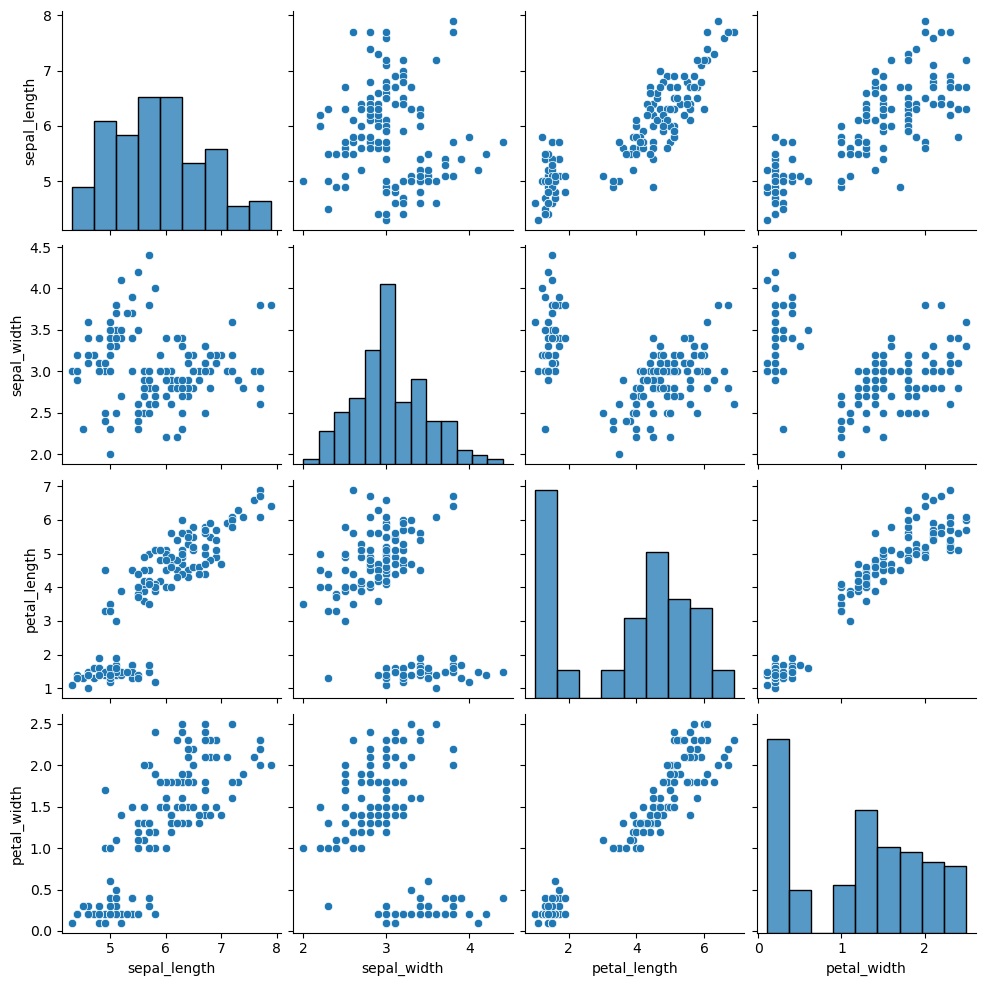

In [6]:
# Create pairwise scatter plots for all feature combinations in the dataset
# This helps visualize relationships between features and spot any patterns or clusters
sns.pairplot(data=dataset)
plt.show()

In [7]:
# Import StandardScaler to normalize the dataset
from sklearn.preprocessing import StandardScaler

# Create a scaler object and fit-transform the dataset to scale all features
# This makes sure all features have mean = 0 and standard deviation = 1
ss = StandardScaler()
dataset = pd.DataFrame(ss.fit_transform(dataset), columns=dataset.columns)


In [8]:
# Import KMeans algorithm for clustering
from sklearn.cluster import KMeans

# Import KneeLocator to find the optimal number of clusters using the elbow method
from kneed import KneeLocator


In [9]:
# Create an empty list to store Within-Cluster Sum of Squares (WCSS)
wcss = []

# Run KMeans for cluster counts from 1 to 20
# Store the inertia (WCSS) for each model to find the optimal number of clusters
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='k-means++')  # Use smart centroid initialization
    km.fit(dataset)
    wcss.append(km.inertia_)


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [10]:
# Use KneeLocator to find the 'elbow point' — the optimal number of clusters
# It detects where the WCSS starts decreasing more slowly
kl = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")

# Print or access the optimal number of clusters
kl.elbow


np.int64(3)

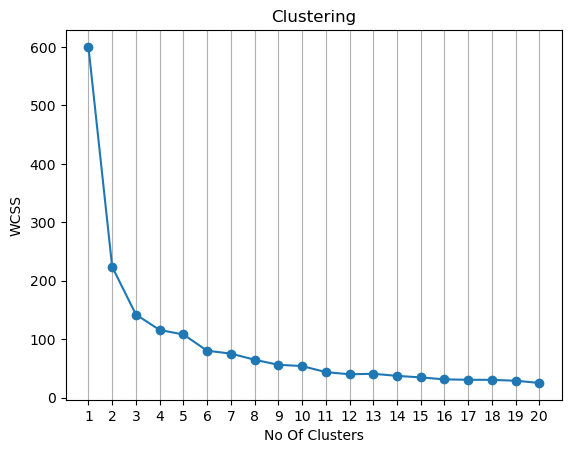

In [11]:
# Plot the WCSS values for each number of clusters to visualize the elbow point
plt.plot(range(1, 21), wcss, marker="o")

# Set the title and axis labels for the plot
plt.title("Clustering")
plt.xlabel("No Of Clusters")
plt.ylabel("WCSS")

# Show x-axis ticks for all cluster numbers
plt.xticks(range(1, 21))

# Add grid lines to the x-axis for better readability
plt.grid(axis="x")


In [12]:
# Note:
# Even though the WCSS plot visually shows an elbow at 3 clusters (which matches the real species),
# the KneeLocator returns 4 as the optimal number of clusters.
# This happens sometimes due to slight curvature differences in the WCSS curve,
# but based on both visual inspection and known labels, 3 clusters are more accurate in this case.


In [13]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model and get cluster labels for each data point
labels = kmeans.fit_predict(dataset)

# Add the predicted cluster labels as a new column in the dataset
dataset["perdict"] = labels


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
dataset.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,perdict
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,0
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2
149,0.068662,-0.124958,0.762759,0.790591,2


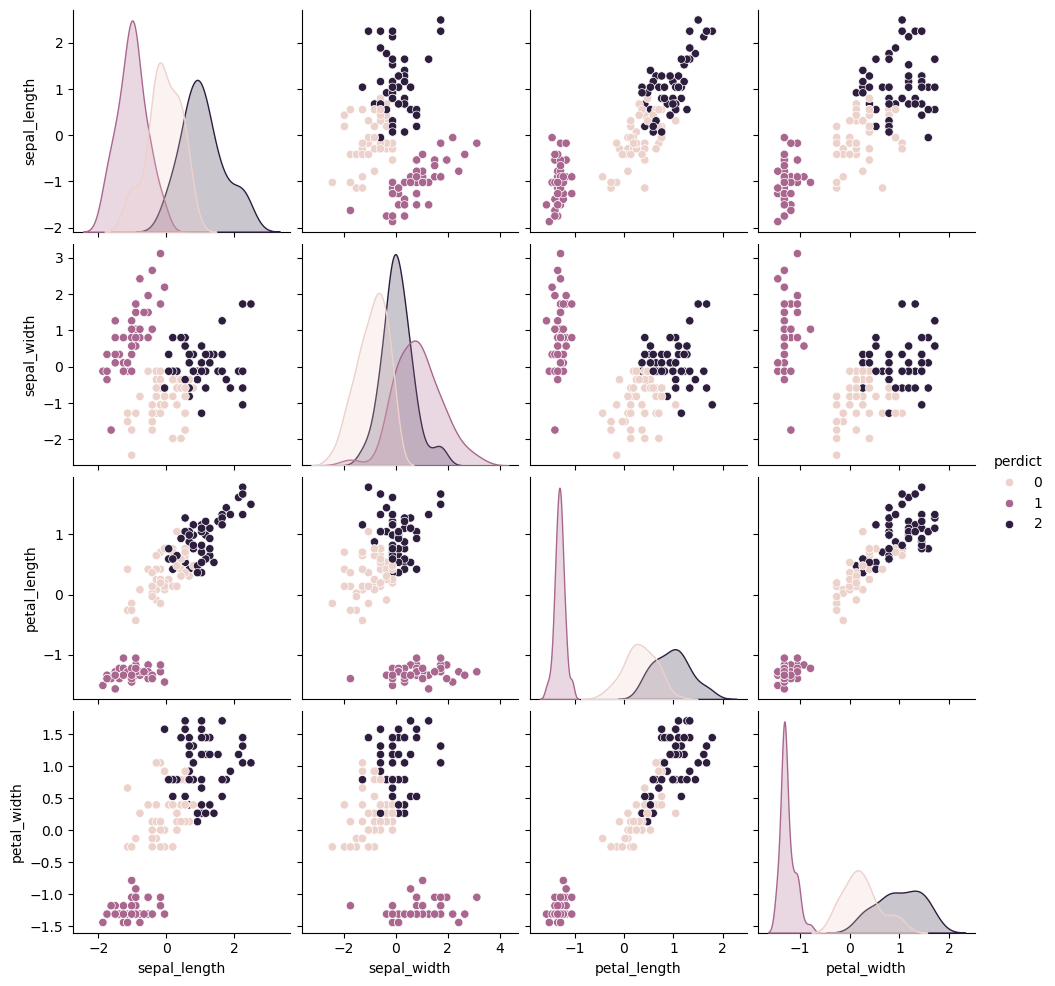

In [15]:
# Create pairwise scatter plots and color them based on predicted clusters
# This helps to visualize how the data points are grouped into clusters
sns.pairplot(data=dataset, hue="perdict")
plt.show()


In [16]:
# Check how many data points are assigned to each predicted cluster
dataset['perdict'].value_counts()

perdict
2    51
1    50
0    49
Name: count, dtype: int64

In [ ]:
data = pd.read_csv("iris.csv")

In [18]:

# Check the original class distribution in the dataset (before dropping 'species')
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [19]:
# Conclusion:
# The predicted clusters have a similar distribution to the original species labels.
# This shows that KMeans was able to group the data quite accurately, 
# even without using the actual species labels (unsupervised learning).